<a href="https://colab.research.google.com/github/DhimanTarafdar/BASIC-NEXT.IS/blob/main/Copy_of_Module_08_ML_Assignment_02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Module 05, 06 & 07 Assignment
## Understanding the ML Problem, Exploratory Data Analysis (EDA) and Basic Preprocessing
**Dataset:** Titanic – Machine Learning from Disaster (Kaggle)

Download the **train.csv** file from Kaggle’s Titanic competition and upload it to this notebook. Rename it to `titanic.csv` or update the file name in the loading cell.
Dataset link: https://www.kaggle.com/datasets/yasserh/titanic-dataset

Total Marks: **100**

### Instructions
- This assignment covers:
  - **Module 05:** Basic ML problem framing (features, target, task type).
  - **Module 06:** Exploratory Data Analysis (EDA).
  - **Module 07:** Basic Preprocessing (handling missing values, encoding, scaling).
- Answer all questions inside this notebook using code and markdown.
- Do not delete the original question texts.
- At the end, the notebook should run from top to bottom without errors.

In [2]:
# ==============================
# Setup
# ==============================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, StandardScaler

sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (8, 5)

print("Libraries imported.")

Libraries imported.


---
## Part 0: Understanding the ML Problem (Module 05) – 10 marks

### 0.1 Load the Dataset and Inspect (5 marks)
**Tasks:**
1. Load `titanic.csv` into a pandas DataFrame.
2. Show `.head()`, `.info()`, and `.describe()`.
3. Briefly look at the column names and data types.


In [4]:
# 0.1 Load the Dataset and Inspect
# TODO: Change file name if needed.

df = pd.read_csv("/content/Titanic-Dataset.csv")#Download the .csv file from Kaggle

print("Shape of dataset:", df.shape)
display(df.head())

print("\nInfo:")
print(df.info())

print("\nDescribe (numeric columns):")
display(df.describe())

Shape of dataset: (891, 12)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S



Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None

Describe (numeric columns):


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


### 0.2 Identify Features, Target and Task Type (5 marks)
**Tasks:**
Based on the dataset:
1. Identify the **target variable** for a predictive model.
2. List at least **5 potential feature columns** you could use.
3. State whether this is a **classification** or **regression** problem, and explain **why**.

Write your answers below.


#### **Your answers**
- Target variable:  Survived (0 or 1)
- Feature columns (at least 5):  Pclass, Sex, Age, SibSp, Parch, Fare, Embarked
- Is this classification or regression, and why?:  This is a classification problem because the target variable (Survived) contains discrete categorical values (0 = died, 1 = survived).

---
## Part A: Exploratory Data Analysis (EDA) – 45 marks

### 1. Initial Exploration and Cleaning Decisions (10 marks)
**Tasks:**
1. Show the number of unique values in each column.
2. Identify columns that are clearly **IDs or high-cardinality text** (for example, `PassengerId`, `Name`, `Ticket`).
3. Decide which of these columns you will **drop** for the rest of the analysis and justify in 2–3 sentences.


In [5]:
# 1. Initial Exploration and Cleaning Decisions (Task 1 is given)
print("Unique values per column:")
for col in df.columns:
    print(col, ":", df[col].nunique())

Unique values per column:
PassengerId : 891
Survived : 2
Pclass : 3
Name : 891
Sex : 2
Age : 88
SibSp : 7
Parch : 7
Ticket : 681
Fare : 248
Cabin : 147
Embarked : 3


#### Columns to drop and justification
- Columns dropped:PassengerId, Name, Ticket, Cabin  
- Justification (2–3 sentences):PassengerId is just a unique identifier with no predictive value. Name and Ticket are high-cardinality text fields (891 and 681 unique values respectively) that don't directly contribute to survival prediction without complex feature engineering. Cabin has 147 unique values with 687 missing entries (77% missing data), making it unreliable for prediction. Dropping these columns will simplify the model while retaining the most informative features.  

---
### 2. Univariate Analysis (15 marks)
**Tasks:**
- Plot histograms for numeric features: `Age`, `Fare`, `SibSp`, `Parch`.
- Plot countplots for categorical features: `Sex`, `Pclass`, `Embarked`.
- Write **two to three insights** about the distributions and any obvious patterns.


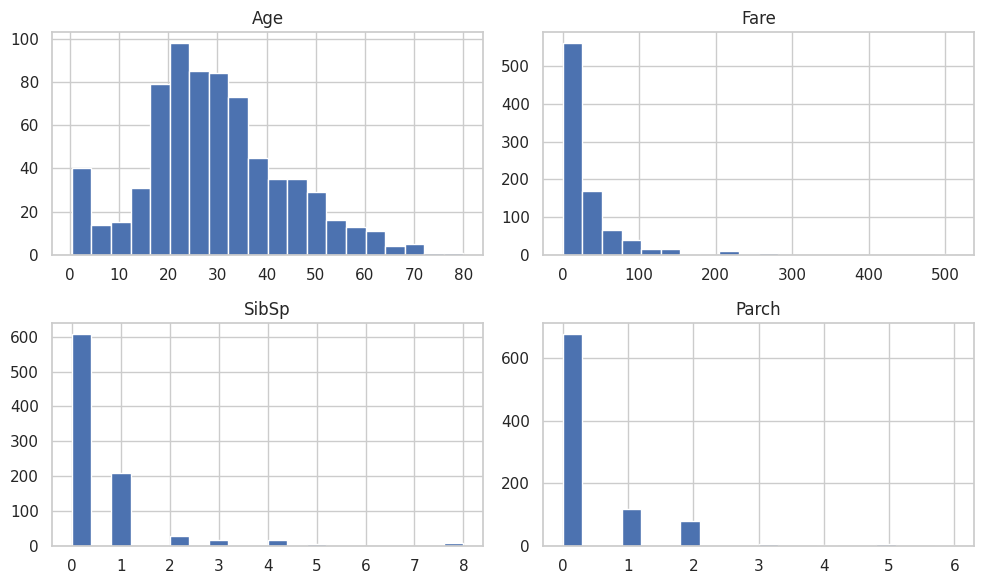

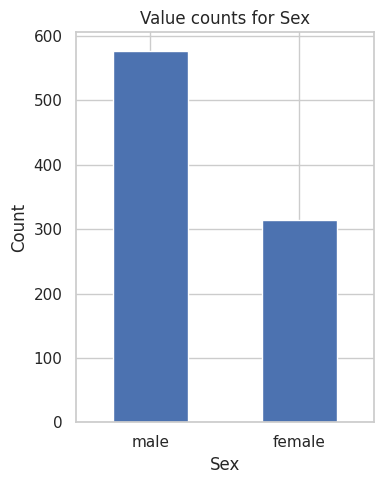

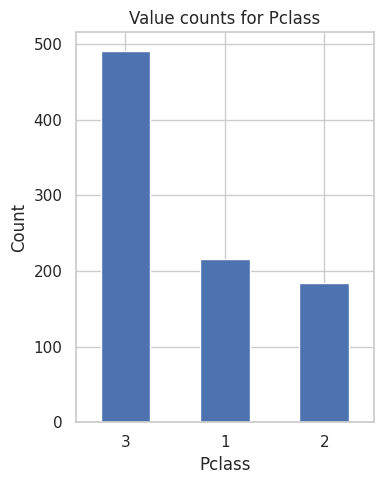

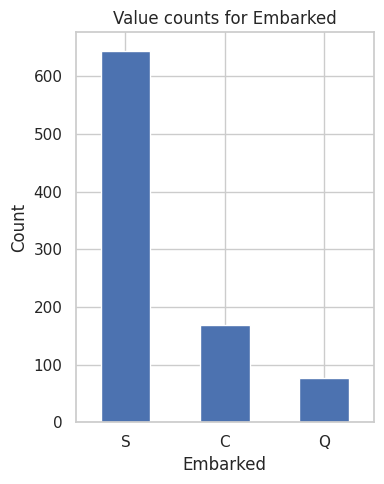

In [9]:
# 2. Univariate Analysis

numeric_cols = ["Age", "Fare", "SibSp", "Parch"]

# Histograms code is written for you
df[numeric_cols].hist(bins=20, figsize=(10, 6))
plt.tight_layout()
plt.show()

# Write Countplots code for key categorical variables [You need to complete]
cat_cols = ["Sex", "Pclass", "Embarked"]
for c in cat_cols:
    plt.figure(figsize=(4,5))

    df[c].value_counts().plot(kind="bar")

    plt.title(f"Value counts for {c}")
    plt.ylabel("Count")


    plt.xticks(rotation=0)

    plt.tight_layout()
    plt.show()

#### Write Your insights
- Insight 1:  The Age distribution shows a right-skewed pattern with most passengers between 20-40 years old, peaking around 20-30 years. There are also notable numbers of children (0-10 years) and elderly passengers (60+ years).
- Insight 2: The Fare distribution is heavily right-skewed with the majority of passengers paying low fares (0-50), while very few paid extremely high fares (up to 500+). This indicates a large number of lower-class passengers and a small wealthy elite.
- Insight 3: Both SibSp and Parch distributions show that most passengers traveled alone or with very small families. Over 600 passengers had 0 siblings/spouses (SibSp=0) and 0 parents/children (Parch=0), suggesting the majority were solo travelers. Only a few passengers traveled with large families, which may impact their survival chances differently.

---
### 3. Bivariate Analysis with Target (15 marks)
Use `Survived` as the target variable.

**Tasks:**
- Compute and plot a **correlation heatmap** for numeric features, including `Survived`.
- Create a **pairplot** for: `Age`, `Fare`, `SibSp`, `Parch`, and `Survived`.
- Write **two to three insights**, including which variables seem associated with survival.


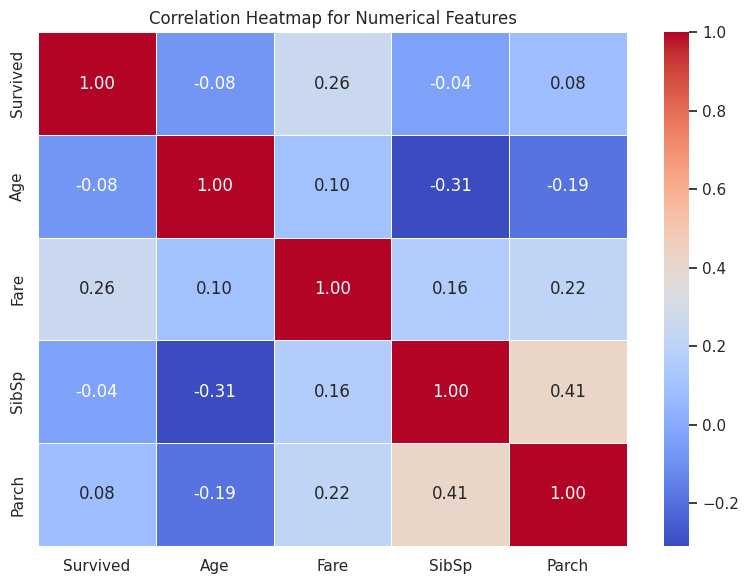

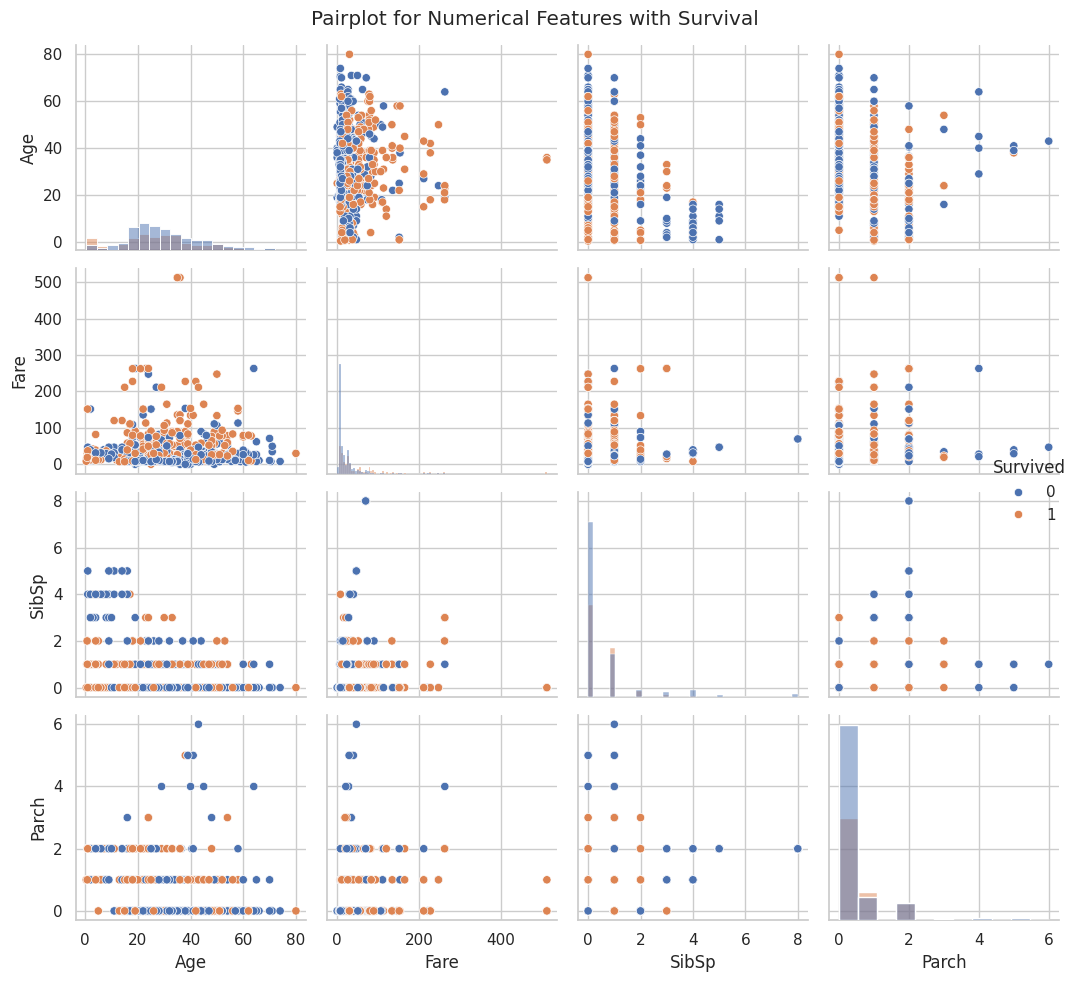

In [13]:
# 3. Bivariate Analysis with Target

num_for_corr = ["Survived", "Age", "Fare", "SibSp", "Parch"]

## Complete this code block to generate correlation heatmap and pairplot

# Correlation Heatmap
corr_matrix = df[num_for_corr].corr()

plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap for Numerical Features")
plt.tight_layout()
plt.show()

# Pairplot
sns.pairplot(df[num_for_corr], hue="Survived", diag_kind="hist")
plt.suptitle("Pairplot for Numerical Features with Survival")
plt.tight_layout()
plt.show()

#### Your insights
- Insight 1: Fare has the strongest positive correlation with Survival (0.26), which means passengers who paid higher ticket prices had better chances of surviving.  
- Insight 2:Age shows a weak negative correlation with Survival (-0.08), suggesting that younger passengers had slightly better survival rates. The pairplot also shows that survivors (orange dots) are somewhat concentrated in the lower age range, which supports the "women and children first" evacuation policy during the disaster.  
- Insight 3: SibSp and Parch both show very weak correlations with Survival (-0.04 and 0.08 respectively), but they have a moderate positive correlation with each other (0.41). This indicates that family size alone was not a strong predictor of survival, though passengers traveling with some family members might have had slightly different outcomes than those traveling completely alone.  

---
### 4. Categorical vs Target Analysis (5 marks)
**Tasks:**
For each of the following categorical features: `Sex`, `Pclass`, `Embarked`:
- Plot a **bar chart** showing the proportion of passengers who survived in each category.
- Write **two short insights** about which categories have higher or lower survival chances.



Survival proportion by Sex:


Survived,0,1
Sex,,
female,0.257962,0.742038
male,0.811092,0.188908


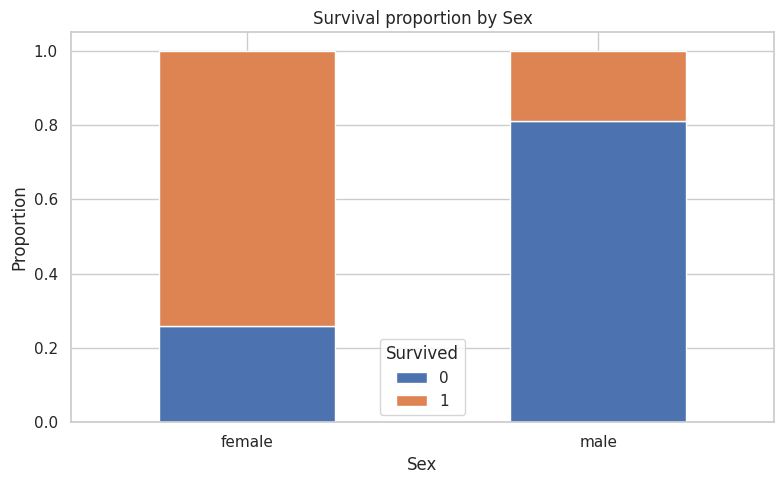


Survival proportion by Pclass:


Survived,0,1
Pclass,,
1,0.370370,0.629630
2,0.527174,0.472826
3,0.757637,0.242363


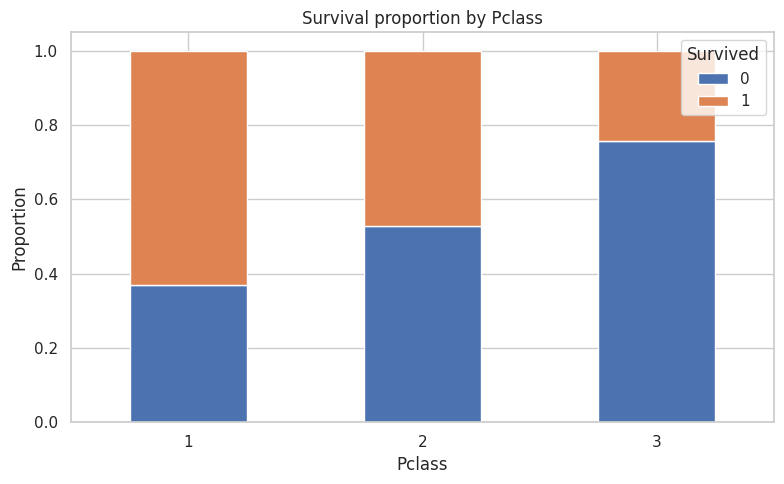


Survival proportion by Embarked:


Survived,0,1
Embarked,,
C,0.446429,0.553571
Q,0.610390,0.389610
S,0.663043,0.336957


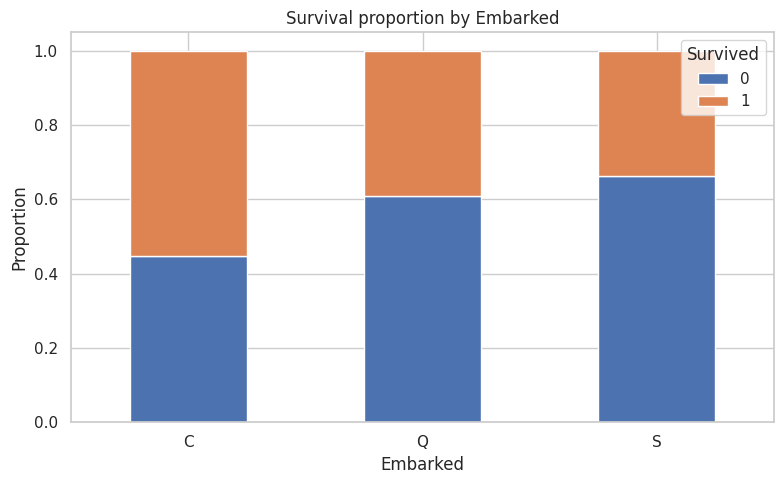

In [14]:
# 4. Categorical vs Target Analysis [Bar chart code is written for you]

cat_target_cols = ["Sex", "Pclass", "Embarked"]

for c in cat_target_cols:
    ct = pd.crosstab(df[c], df["Survived"], normalize="index")
    print(f"\nSurvival proportion by {c}:")
    display(ct)
    ct.plot(kind="bar", stacked=True)
    plt.title(f"Survival proportion by {c}")
    plt.ylabel("Proportion")
    plt.xticks(rotation=0)
    plt.tight_layout()
    plt.show()

#### Your insights
- Insight 1: Female passengers had much higher survival rates (74%) compared to male passengers (only 19%). This clearly shows that the "women and children first" evacuation policy was followed during the Titanic disaster, giving women a significantly better chance of survival.
- Insight 2:  First class passengers had the highest survival rate (63%), while third class passengers had the lowest (24%). This indicates that passenger class was a major factor in survival, as upper-class passengers likely had better access to lifeboats and were located closer to the deck, while lower-class passengers faced more barriers to escape.

---
## Part B: Basic Data Preprocessing – 45 marks

Focus: **Handling missing values, encoding categorical variables, and scaling numeric features.**

### 5. Handling Missing Values (15 marks)
**Tasks:**
1. Show the count of missing values in each column.
2. Decide how to handle missing values for:
   - `Age` (numeric)
   - `Embarked` (categorical)
   - `Cabin` (many missing values)
3. Implement your chosen strategy in code.
4. Show missing value counts again to confirm.
5. Explain your choices in **3–4 sentences**.


In [18]:
# 5. Handling Missing Values

print("Missing values before:")
print(df.isna().sum())

if 'Cabin' in df.columns:
    df = df.drop(columns=['Cabin'])

df['Age'] = df['Age'].fillna(df['Age'].median())

df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])

print("\nMissing values after handling:")
print(df.isna().sum())

Missing values before:
PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

Missing values after handling:
PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64


#### Explanation of your strategy
- Why you dropped or kept `Cabin`: Cabin was dropped because it had 687 missing values out of 891 rows (77% missing data), which makes it unreliable and would require too much imputation that could introduce bias.
- Why you used median/mean for `Age`: I used median for Age because the Age distribution is right-skewed with outliers. Median is more robust to outliers than mean and better represents the typical passenger age.
- Why you used mode or another method for `Embarked`:I used mode for Embarked because it is a categorical variable with only 2 missing values. The mode ('S' - Southampton) is the most common embarkation point and is a reasonable assumption for missing data  

---
### 6. Encoding Categorical Variables (15 marks)
Focus on the following categorical features:
- `Sex`
- `Embarked`
- `Pclass` (treat as categorical)

**Tasks:**
- Use `OneHotEncoder` from sklearn to encode these features.
- Keep `Survived` and the main numeric features (`Age`, `Fare`, `SibSp`, `Parch`).
- Show the shape and head of the encoded DataFrame.


In [24]:
# 6. Encoding Categorical Variables
from sklearn.preprocessing import OneHotEncoder

df_enc = df.copy()

# Select features for encoding and keep important numeric ones
cat_features = ["Sex", "Embarked", "Pclass"]
numeric_features = ["Age", "Fare", "SibSp", "Parch"]
target_col = "Survived"

# One hot encode categorical variables
encoded_df = pd.get_dummies(
    df_enc[cat_features],
    drop_first=True,
    dtype=int
)

# Build final encoded DataFrame
df_model = pd.concat([
    df_enc[[target_col] + numeric_features],
    encoded_df
], axis=1)

print("Shape after encoding:", df_model.shape)
display(df_model.head())

Shape after encoding: (891, 9)


,Survived,Age,Fare,SibSp,Parch,Pclass,Sex_male,Embarked_Q,Embarked_S
0,0,22.0,7.2500,1,0,3,1,0,1
1,1,38.0,71.2833,1,0,1,0,0,0
2,1,26.0,7.9250,0,0,3,0,0,1
3,1,35.0,53.1000,1,0,1,0,0,1
4,0,35.0,8.0500,0,0,3,1,0,1


---
### 7. Scaling Numeric Features (15 marks)
**Tasks:**
- Use `StandardScaler` on the numeric features: `Age`, `Fare`, `SibSp`, `Parch`.
- Plot boxplots of these features **before** and **after** scaling.
- Write **two sentences** explaining how scaling changes the numeric values and why it is useful before training some ML models.


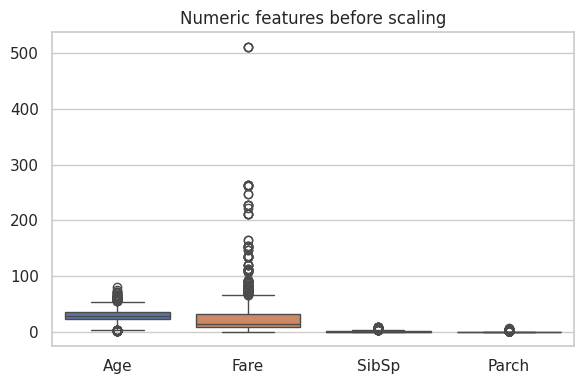

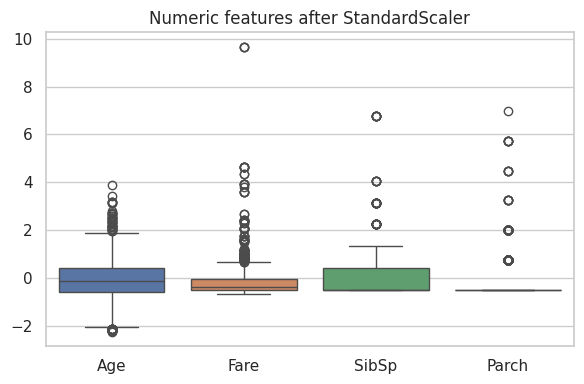

In [26]:
# 7. Scaling Numeric Features
from sklearn.preprocessing import StandardScaler

score_cols = ["Age", "Fare", "SibSp", "Parch"]

# Boxplot before scaling
plt.figure(figsize=(6, 4))
sns.boxplot(data=df_model[score_cols])
plt.title("Numeric features before scaling")
plt.tight_layout()
plt.show()

# Apply StandardScaler
scaler = StandardScaler()
scaled_array = scaler.fit_transform(df_model[score_cols])

# Create DataFrame with scaled values
df_scaled = df_model.copy()
df_scaled[score_cols] = scaled_array

# Boxplot after scaling
plt.figure(figsize=(6, 4))
sns.boxplot(data=df_scaled[score_cols])
plt.title("Numeric features after StandardScaler")
plt.tight_layout()
plt.show()

#### Your observations on scaling
- Sentence 1:Before scaling, the features had very different ranges with Fare dominating the scale (0-500+) while Age, SibSp, and Parch had much smaller ranges, making it difficult to compare them on the same plot.  
- Sentence 2: After applying StandardScaler, all features are transformed to have a mean of 0 and similar scales (mostly between -2 to +4), which makes them comparable and ensures that no single feature dominates when training machine learning models like logistic regression or SVM.  

---
### 8. Simple Feature Quality Check (5 marks)
**Tasks:**
- Show `.info()` of the final processed DataFrame (`df_scaled`).
- Confirm there are no missing values.
- Confirm that all remaining features are numeric and suitable for most ML models.
- Write **one short concluding remark** about dataset readiness.


In [27]:
# 8. Simple Feature Quality Check
print(df_scaled.info())

print("\nTotal missing values in final DataFrame:", df_scaled.isna().sum().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Survived    891 non-null    int64  
 1   Age         891 non-null    float64
 2   Fare        891 non-null    float64
 3   SibSp       891 non-null    float64
 4   Parch       891 non-null    float64
 5   Pclass      891 non-null    int64  
 6   Sex_male    891 non-null    int64  
 7   Embarked_Q  891 non-null    int64  
 8   Embarked_S  891 non-null    int64  
dtypes: float64(4), int64(5)
memory usage: 62.8 KB
None

Total missing values in final DataFrame: 0


#### Final remark on dataset readiness
- Your remark:The final dataset is clean and ready for machine learning. It contains 891 complete records with 9 numeric features, zero missing values, and properly scaled variables, making it suitable for training classification models to predict passenger survival on the Titanic.  

---
## Submission
- Run all cells from top to bottom to make sure everything works.
- Set the Colab file's shareable link to ‘Anyone with the link’ and ‘View’ access, then submit it in the Phitron Assignment module's Assignment submission section.